# Campo magnético generado por un alambre

Mientras se construye la bobina, mostramos cómo es el campo magnético generado alrededor de un alambre de longitud $L$ por el cual pasa una corriente $I$.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
# Constantes 
mu0 = scipy.constants.mu_0

In [3]:
def CampoAlambre(Q,P,L,I,N=10):
    """
    Calcula el campo magnético producido por un alambre de longitud L por el que pasa una corriente I
        Q[a,b,c]: Posición del alambre 
        P[xp,yp,zp]: Posición del punto P(xp,yp,zp) donde se desea medir el campo 
        L: Longitud del alambre
        I: Corriente que pasa por el alambre
        N: Divisiones del alambre para luego sumar su contribución al campo. Default N=10
    """
    ra = np.array([-L/2-P[0],0,0])  # 
    rb = np.array([0,P[1]-Q[1],0])  # 
    rc = np.array([0,0,P[2]-Q[2]])  #

    ds = np.array([L/N,0,0])    # Pequeña distancia en las que está divido el alambre

    B = np.array([0,0,0])

    while ra[0] <= L/2:
        r = ra + rb + rc
        dB = (mu0/(4*np.pi))*np.cross(I*ds,r)/np.linalg.norm(r)**3
        B = B + dB
        ra = ra + ds

    return B

In [4]:
L = 0.5     # Longitud del alambre [m]
I = 1       # Corriente [A]
N = 10

## Campo magnético en un punto $P$. 
Para este caso el alambre está paralelo al eje $x$, es perpendicular al plano $yz$.

In [5]:
# Posición del alambre Q[a,b,c]
Q1 = np.array([0,0,0])
# Posición del punto P[xp,yp,zp] donde se desea medir el campo
P1 = np.array([0.1,-0.1,0.05])

B1 = CampoAlambre(Q1,P1,L,I,N)
print("Componente del campo en x: Bx =",B1[0], "T\n",
      "Componente del campo en y: By =",B1[1], "T\n",
      "Componente del campo en z: Bz =",B1[2], "T\n",
      "Magnitud del campo en P: B =",np.linalg.norm(B1), "T"
      )

Componente del campo en x: Bx = 0.0 T
 Componente del campo en y: By = -7.541263404092547e-07 T
 Componente del campo en z: Bz = -1.5082526808185094e-06 T
 Magnitud del campo en P: B = 1.6862777607782402e-06 T


## Campo magnético como función de la distancia
La gráfica muestra cómo cambia la magnitud del campo magnético con la distancia, para el caso el eje $y$.

In [6]:
Q1 = np.array([0,-0.5,0])   # Posición del alambre Q[a,b,c]
B0 = np.array([0,0,0])

y = np.linspace(-1, 1, 200)

B1 = np.zeros(shape=len(y))

for i in range(len(y)):
    P1 = np.array([0,y[i],0])
    B0 = CampoAlambre(Q1,P1,L,I,N)
    B1[i] = np.linalg.norm(B0)
    # cómo no conectar la discontinuidad
    if B1[i]== 0:
        B1[i]=None

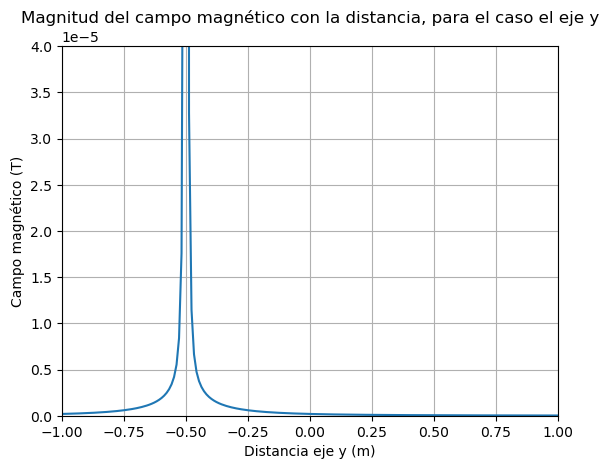

In [8]:
fig1, ax1 = plt.subplots()
ax1.plot(y, B1)

ax1.set(xlabel='Distancia eje y (m)', ylabel='Campo magnético (T)',
       title='Magnitud del campo magnético con la distancia, para el caso el eje y',
       xlim=(-1, 1), ylim=(0, 0.00004))
ax1.grid()

plt.show()

## Descripciones vectoriales del campo magnético
Vamos a presentar gráficamente el campo vectorial en las vecindades del alambre. Para esto se tiene una una función que retorna los valores del campo magnético en un plano yz, para un conductor puesto en las coordenadas Q.

In [5]:
def CampoRejilla (Q,y,z,L,I,N):
    """
    Retorna los valores del campo magnético en un plano yz, para un conductor puesto en las coordenadas Q
        Q[a,b,c]: Posición del conductor 
        y,z: límites de las coordenadas del plano yz
        L: Longitud del conductor (usado luego por la función CampoAlambre())
        I: Corriente que pasa por el alambre (usado luego por la función CampoAlambre())
        N: Divisiones del alambre para luego sumar su contribución al campo (usado luego por la función CampoAlambre()
    """
    B0 = np.array([0,0,0]) 

    # Calcula el campo para cada coordenada yz. Cada coordenada tiene tres valores [Bx,By,Bz]
    for k in range(len(z)):
        P = np.array([0,y[0],z[k]])
        Bv = CampoAlambre(Q,P,L,I,N)

        for j in range(len(y)-1):
            P = np.array([0,y[j+1],z[k]])
            B0 = CampoAlambre(Q,P,L,I,N)
            Bv = np.vstack((Bv,B0))

        if k==0:
            B = Bv
        else:
            B = np.hstack((B,Bv))

    col_y = []
    col_z = []

    # Construye la lista de los elementos que serán extraídos de B para dejar finalmente By y Bz
    for i in range(len(B[0,])):
        if (i-1)%3==0:
            col_y = col_y
        else:
            col_y.append(i)

        if (i+1)%3==0:
            col_z = col_z
        else:
            col_z.append(i)

    By = np.delete(B,col_y,axis=1)
    Bz = np.delete(B,col_z,axis=1)

            
    return By,Bz

In [17]:
y = np.linspace(-0.5, 0.5, 50)
z = np.linspace(-0.5, 0.5, 50)

Q = np.array([0,-0.2,0]) # Posición del alambre Q[a,b,c]. Debe estar en el espacio yz
By, Bz = CampoRejilla(Q,y,z,L,I,N)

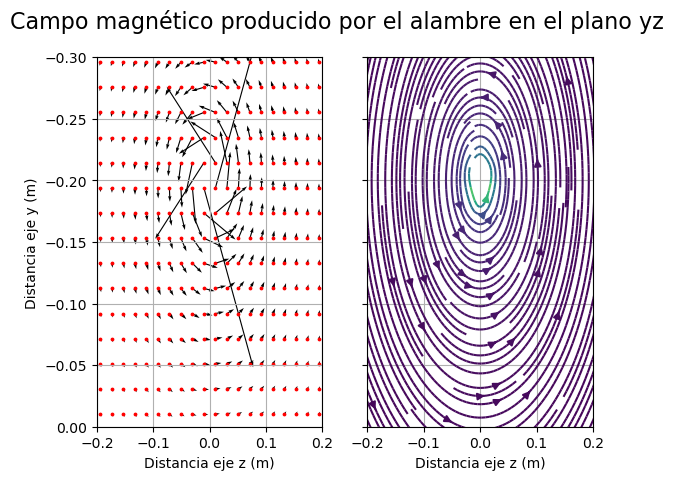

In [18]:
# Para construir una gráfica tipo quiver y streamplot
Z, Y = np.meshgrid(z, y)
U = Bz
V = By

fig2, (ax2, ax3) = plt.subplots(1,2, sharey=True)
ax2.quiver(Z, Y, U, V, angles='xy', width=.005)#, color="C0", angles='xy',scale_units='xy', scale=1, width=.015)

ax2.set(xlabel='Distancia eje z (m)', ylabel='Distancia eje y (m)',
        xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
ax2.scatter(Z, Y, color='r', s=3)
ax2.grid()

ax3.streamplot(Z, Y, U, V, density=5, color=100*np.sqrt(U**2 + V**2))

ax3.set(xlabel='Distancia eje z (m)',
        xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
ax3.grid()
fig2.suptitle('Campo magnético producido por el alambre en el plano yz', fontsize=16)

plt.show()

## Campo magnético en el plano con dos conductores en paralelo
Utilizando la función CampoRejilla para superponer el campo en el plano producido por dos conductores.

In [19]:
# Definición del espacio
y = np.linspace(-0.3, 0.1, 20)
z = np.linspace(-0.2, 0.2, 20)

# Para el alambre 1
Q1 = np.array([0,-0.2,0])       # Coordenadas del alambre
By1, Bz1 = CampoRejilla(Q1,y,z,L,I,N)

# Para el alambre 2
Q2 = np.array([0,-0.05,0.1])    # Coordenadas del alambre
By2, Bz2 = CampoRejilla(Q2,y,z,L,-I,N)

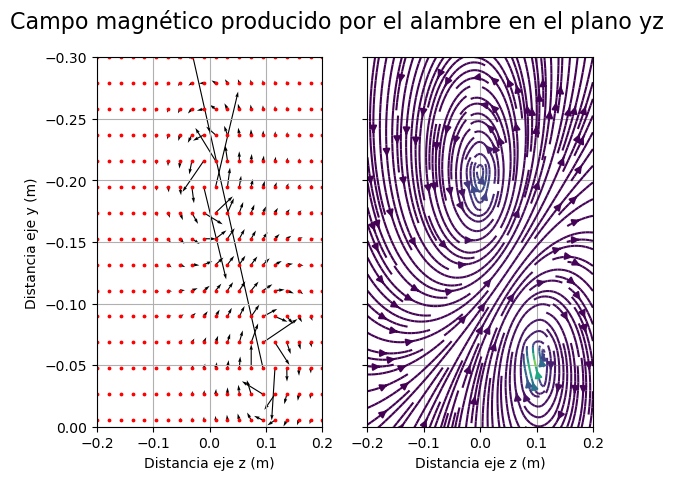

In [20]:
# Para construir una gráfica tipo quiver y streamplot
Z, Y = np.meshgrid(z,y)
U = Bz1 + Bz2
V = By1 + By2

fig3, (ax2, ax3) = plt.subplots(1,2, sharey=True)

ax2.quiver(Z, Y, U, V, angles='xy', width=.005)
ax2.set(xlabel='Distancia eje z (m)', ylabel='Distancia eje y (m)',
        xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
ax2.scatter(Z, Y, color='r', s=3)
ax2.grid()

ax3.streamplot(Z, Y, U, V, density=2, color=100*np.sqrt(U**2 + V**2))

ax3.set(xlabel='Distancia eje z (m)',
        xlim=(-0.2, 0.2), ylim=(0.0, -0.3))
ax3.grid()
fig3.suptitle('Campo magnético producido por el alambre en el plano yz', fontsize=16)

plt.show()